In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import csv
import keras
import keras.utils
from keras import utils as np_utils

Using TensorFlow backend.


In [4]:
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, ZeroPadding2D
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam, SGD

In [5]:
image1 = cv2.imread('/home/navya/Documents/sjsu/project-257/cardboard1.jpg',0)
surf = cv2.xfeatures2d_SURF()
surf = cv2.xfeatures2d.SURF_create()
(kps, descs) = surf.detectAndCompute(image1, None)

print("# kps: {}, descriptors: {}".format(len(kps), descs))


# kps: 469, descriptors: [[ 8.2333363e-06  2.3075037e-04  3.6252668e-04 ...  4.1609266e-05
   7.1108172e-04  3.1130301e-04]
 [ 2.9380163e-04  2.7914572e-04  5.3405075e-04 ... -1.1645127e-04
   7.1276637e-04  4.0463224e-04]
 [ 2.1327176e-04 -1.9665716e-04  6.9319404e-04 ... -2.0784964e-03
   5.0789448e-03  3.1005768e-03]
 ...
 [ 3.1367859e-03  7.6775334e-04  3.1367859e-03 ... -7.1539526e-04
   3.8742932e-04  1.0167323e-03]
 [ 4.3442886e-04 -3.2695360e-04  4.9619464e-04 ... -4.0614425e-04
   7.7786896e-04  6.2689936e-04]
 [ 1.2589230e-03 -1.6731097e-04  2.3260708e-03 ...  1.5210104e-03
   2.5083488e-02  2.5123921e-03]]


In [6]:
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))
print(image1.shape)

# kps: 469, descriptors: (469, 64)
(384, 512)


(<matplotlib.image.AxesImage at 0x7f613b424eb8>,
 <function matplotlib.pyplot.show(*args, **kw)>)

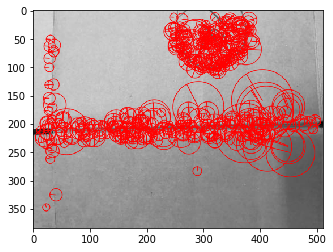

In [7]:
img2 = cv2.drawKeypoints(image1,kps,None,(255,0,0),4)
plt.imshow(img2),plt.show

In [8]:
num_classes = 6
num_of_samples = 2533
labels = np.ones((num_of_samples,), dtype='int64')

labels[0:402] = 0
labels[403:903] = 1
labels[904:1314] = 2
labels[1315:1908] = 3
labels[1909:2390] = 4
labels[2391:] = 5

names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

label_categorical = np_utils.to_categorical(labels, num_classes)
label_categorical


array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]], dtype=float32)

In [9]:
from os import listdir
from os.path import isfile, join
cardboard_path='/home/navya/Documents/sjsu/project-257/dataset-resized/dataset-resized/cardboard'
metal_path = '/home/navya/Documents/sjsu/project-257/dataset-resized/dataset-resized/metal'
glass_path = '/home/navya/Documents/sjsu/project-257/dataset-resized/dataset-resized/glass'
#plastic_path = ''/home/navya/Documents/sjsu/project-257/dataset-resized/dataset-resized/cardboard''
#trash_path = ''/home/navya/Documents/sjsu/project-257/dataset-resized/dataset-resized/cardboard''
only_cardboard_files = [ f for f in listdir(cardboard_path) if isfile(join(cardboard_path,f)) ]
cardboard_images = np.empty(len(only_cardboard_files), dtype=object)
surf = cv2.xfeatures2d.SURF_create()
print(len(only_cardboard_files))
for n in range(0, len(only_cardboard_files)):
    cardboard_images[n] = cv2.imread( join(cardboard_path,only_cardboard_files[n]),0)
    
    (kps, descs) = surf.detectAndCompute(cardboard_images[n], None)
       
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))

only_metal_files = [ f for f in listdir(metal_path) if isfile(join(metal_path,f)) ]
metal_images = np.empty(len(only_metal_files), dtype=object)
for n in range(0, len(only_cardboard_files)):
    metal_images[n] = cv2.imread( join(metal_path,only_metal_files[n]),0 )
    
    (mt_kps, mt_descs) = surf.detectAndCompute(metal_images[n], None)
    
    
print("# kps: {}, descriptors: {}".format(len(mt_kps), mt_descs.shape))

only_glass_files = [ f for f in listdir(glass_path) if isfile(join(glass_path,f)) ]
glass_images = np.empty(len(only_glass_files), dtype=object)
for n in range(0, len(only_cardboard_files)):
    glass_images[n] = cv2.imread( join(glass_path,only_glass_files[n]),0 )
    
    (gl_kps, gl_descs) = surf.detectAndCompute(glass_images[n], None)
    
    
print("# kps: {}, descriptors: {}".format(len(gl_kps), gl_descs.shape))



403
# kps: 669, descriptors: (669, 64)
# kps: 572, descriptors: (572, 64)
# kps: 143, descriptors: (143, 64)


In [10]:
print(mt_descs[0])

[-1.5223821e-03  1.7343697e-03  1.6459767e-03  2.4038013e-03
  7.4232561e-03 -6.4175217e-03  3.5362240e-02  1.1115365e-02
  1.4495643e-02 -1.7561752e-02  1.4495643e-02  1.7561752e-02
  7.6547486e-04 -2.0974646e-04  8.2622300e-04  3.3595107e-04
 -1.7658168e-02 -1.4272116e-02  2.6939817e-02  4.9372032e-02
  1.5342268e-01  6.3960694e-02  4.6628627e-01  1.5143441e-01
 -1.3115084e-01  8.7524645e-02  2.7137554e-01  2.2917120e-01
  1.1261548e-02 -1.5653972e-02  1.1261548e-02  1.5653972e-02
 -2.2371452e-02 -1.4934669e-02  3.0204955e-02  1.9032421e-02
  3.6349842e-01 -1.3070893e-01  3.8130355e-01  1.3144802e-01
 -3.0284074e-01 -3.4669869e-02  3.5917959e-01  1.7018872e-01
  1.6313404e-02 -1.4859819e-02  1.7490856e-02  1.6315106e-02
 -1.4006866e-04 -2.1018246e-04  1.2856673e-03  5.4333417e-04
  2.1520287e-02 -6.3114604e-03  2.5605414e-02  6.5690749e-03
  2.2290491e-03 -7.2168803e-04  8.2040399e-02  1.6154179e-02
 -1.0291771e-03  9.4820996e-04  2.7949810e-03  1.1933747e-03]


In [12]:
print(len(kps))

669


In [13]:
print(mt_descs.shape)
print(mt_descs)

(572, 64)
[[-1.52238214e-03  1.73436967e-03  1.64597668e-03 ...  9.48209956e-04
   2.79498100e-03  1.19337474e-03]
 [-3.97089025e-05  2.41788206e-04  9.00066079e-05 ...  8.32282749e-05
   2.19581183e-02  1.16416719e-03]
 [ 8.63314926e-05  3.14534671e-04  9.34935815e-05 ...  4.89049475e-04
   1.57095250e-02  6.31770992e-04]
 ...
 [-1.77833587e-02  1.71056448e-03  1.89354066e-02 ...  1.00780642e-04
   2.17837817e-03  1.09899556e-04]
 [ 7.95185473e-03 -1.64106008e-04  1.04771368e-02 ... -1.96535446e-04
   8.06217373e-04  2.90045049e-04]
 [ 1.67758008e-05 -1.55504279e-06  2.52906641e-04 ...  6.56576420e-04
   1.26959532e-02  1.12204743e-03]]


In [14]:
from sklearn.cluster import KMeans
def BOVW(feature_descriptors, n_clusters = 15):
    print("Bag of visual words with {} clusters".format(n_clusters))
    combined_features = np.vstack(np.array(feature_descriptors))
    print("Starting K-means training")
    kmeans_obj = KMeans(n_clusters=15, random_state=0).fit(combined_features)
    result = kmeans_obj.predict(combined_features)
    return result
    

Bag of visual words with 15 clusters
Starting K-means training
572


(array([23., 36., 30., 45., 41., 54., 35., 53., 46., 25., 43., 31., 50.,
        36., 24.]),
 array([ 0.        ,  0.93333333,  1.86666667,  2.8       ,  3.73333333,
         4.66666667,  5.6       ,  6.53333333,  7.46666667,  8.4       ,
         9.33333333, 10.26666667, 11.2       , 12.13333333, 13.06666667,
        14.        ]),
 <a list of 15 Patch objects>)

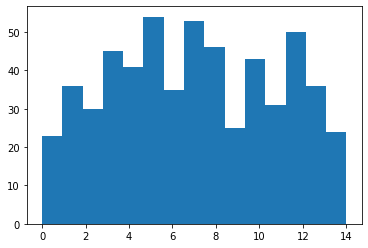

In [15]:
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.cluster import MiniBatchKMeans
result = BOVW(mt_descs) 
counter = Counter(result)
total=0
for val in counter.values():
    total += val
print(total)
plt.hist(result, bins=15)

In [16]:

from sklearn.model_selection import train_test_split
train, test = train_test_split(metal_images, test_size=0.1, random_state=42)